In [6]:
import os
import pandas as pd
import numpy as np
import function_api

In [7]:
data_basic_path = '../year/'
years = os.listdir(data_basic_path)

### 提取取各年之年齡 (part2/age_cocncat.csv)

In [3]:
output_dir = '../part3/'
savefileName = 'team'
file_name = 'eResponse.csv'
col_names = ['eRecordT01', 'eResponseT03']

In [18]:
function_api.concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/team_concat.csv. . . .


'Success'

In [19]:
output_dir = '../part3/'
savefileName = 'address'
file_name = 'eScene.csv'
col_names = ['eRecordT01', 'eSceneT01']

In [20]:
function_api.noYear_concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/address_concat.csv. . . .


'Success'

###### eDisposition.T09 - 現場是否為危急個案

In [21]:
output_dir = '../part3/'
savefileName = 'isALT'
file_name = 'eDisposition.csv'
col_names = ['eRecordT01', 'eDispositionT09']

In [22]:
function_api.noYear_concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/isALT_concat.csv. . . .


'Success'

In [23]:
output_dir = '../part3/'
savefileName = 'patientDisposition'
file_name = 'eDisposition.csv'
col_names = ['eRecordT01', 'eDispositionT07']

In [24]:
function_api.noYear_concat_col(data_basic_path, years, file_name, col_names, output_dir, savefileName)

2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Saving in../part3/patientDisposition_concat.csv. . . .


'Success'

#### merge 

In [25]:
import csv

dir =  "../part3"
merge_path_file = dir + "/merge.csv"

# 創建資料夾
if not (os.path.exists(dir)):
    os.makedirs(dir)
    print("Dir Created ")
else:
    print("Dir Existed ")

# 創建 _merge.csv 並給予 主鍵('eRecordT01')
with open(merge_path_file, 'w') as file:
    dw = csv.DictWriter(file, delimiter=',', fieldnames=['eRecordT01'])
    dw.writeheader()

full_path = ['../part3/address_concat.csv', '../part3/team_concat.csv', '../part3/isALT_concat.csv', '../part3/patientDisposition_concat.csv']

df_list = [pd.read_csv(file, low_memory=False) for file in full_path]

for file in df_list:
    merge = pd.read_csv(merge_path_file, low_memory=False)
    result = merge.merge(file, on='eRecordT01', how='right')  #逐一基於eRecordT01欄位合併到第一個Pandas DataFrame
    result.to_csv(merge_path_file, index=False)


data = pd.read_csv('../part3/' + 'merge.csv')
data = data[['year','eRecordT01','eDispositionT09','eResponseT03', 'eDispositionT07' ,'eSceneT01']]
data.to_csv(merge_path_file, index=False)

Dir Existed 


### 分隊派遣統計

![RUNOOB 图标](../img/District.png)

###### 建立分隊區域 字典(dict)

In [8]:
District_dict = {'中區':['中區91'], '南區':['信義91', '勤工91'], '東區':['東英91'], '北區':['中港91', '中港92', '中港93', '大誠91'], '南屯區':['南屯91','南屯92' ,'春社91'], '西屯區':['黎明91','黎明92' , '協和91', '工業區91', '西屯91', '西屯93'], '北屯區':['北屯91', '北屯92','四平91', '水湳91', '文昌91', '文昌92', '東山91'], '太平區':['太平91','太平92' ,'中山91', '車籠埔91'], '大里區':['仁化91', '大里91','大里92' ,'十九甲91', '國光91'], '霧峰區':['霧峰91', '霧峰92'], '烏日區':['烏日91', '烏日92','溪湳91'], '大肚區':['大肚91'], '龍井區':['龍井91', '犁份91'], '梧棲區':['梧棲91'], '沙鹿區':['沙鹿91', '清泉91'], '大雅區':['大雅91'], '潭子區':['潭子91', '頭家厝91'], '神岡區':['神岡91'], '豐原區':['豐原91','豐原92' ,'豐南91'], '大甲區':['幼獅91', '大甲91'], '外埔區':['外埔91'], '大安區':['大安91'], '后里區':['后里91', '后里92'], '石岡區':['石岡91'], '新社區':['新社91'], '東勢區':['東勢91', '東勢92'], '和平區':['和平91', '梨山91', '雙崎91', '谷關91']}


District_sum = {'中區': 0, '南區':0, '東區':0, '北區':0,'西區':0 , '南屯區':0, '西屯區':0, '北屯區':0, '太平區':0, '大里區':0, '霧峰區':0,'烏日區': 0 ,'大肚區':0, '龍井區':0, '梧棲區':0, '沙鹿區':0, '大雅區':0, '潭子區':0, '神岡區':0, '豐原區':0, '大甲區':0, '外埔區':0, '大安區':0, '后里區':0, '石岡區':0, '新社區':0, '東勢區':0, '和平區':0, '清水區':0}

In [9]:
address_df = pd.read_csv('../part3/merge.csv')

In [10]:
counter_colName = "eResponseT03" # 派遣分隊

#### 12年總分隊出勤統計 (多 - 少)

In [11]:
class_Counter = function_api.count(address_df, counter_colName)
print(class_Counter)
# team_sum.append(class_Counter)

Counter({'101004_豐原91': 52183, '101004_中區91': 49473, '101004_信義91': 46191, '101004_文昌91': 44521, '101004_南屯91': 43132, '101004_中港91': 42411, '101004_黎明91': 40767, '101004_大雅91': 39110, '101004_大誠91': 38734, '101004_北屯91': 37224, '101004_水湳91': 37009, '101004_中山91': 36494, '101004_潭子91': 36042, '101004_西屯91': 35357, '101004_太平91': 33842, '101004_霧峰91': 32636, '101004_沙鹿91': 31886, '101004_清水91': 31122, '101004_勤工91': 30958, '101004_四平91': 28834, '101004_協和91': 28690, '101004_國光91': 28268, '101004_神岡91': 27689, '101004_烏日91': 26584, '101004_東山91': 26226, '101004_仁化91': 24175, '101004_東英91': 24128, '101004_十九甲91': 23739, '101004_后里91': 23624, '101004_犁份91': 23324, '101004_中港93': 22854, '101004_大甲91': 21973, '101004_大里91': 21967, '101004_梧棲91': 21790, '101004_豐原92': 21126, '101004_東勢91': 20900, '101004_龍井91': 19107, '101004_清泉91': 18319, '101004_春社91': 17534, '101004_大肚91': 16807, '101004_頭家厝91': 16564, '101004_中港92': 15568, '101004_外埔91': 14138, '101004_石岡91': 12806, '101004_文昌92': 11745,

#### 各區統計

* 新增92、93

In [12]:
team_data=address_df[counter_colName].apply(lambda t: t[7:])
for item in team_data:
    for item_dict in District_dict:
        if item in District_dict[item_dict]:
            District_sum[item_dict] += 1
        else:
            pass

print(District_sum)

{'中區': 54982, '南區': 85947, '東區': 27862, '北區': 133622, '西區': 0, '南屯區': 75522, '西屯區': 133924, '北屯區': 207178, '太平區': 92539, '大里區': 113126, '霧峰區': 46719, '烏日區': 44731, '大肚區': 18435, '龍井區': 47298, '梧棲區': 24429, '沙鹿區': 56185, '大雅區': 42567, '潭子區': 59191, '神岡區': 30378, '豐原區': 88527, '大甲區': 34936, '外埔區': 15919, '大安區': 10086, '后里區': 29446, '石岡區': 14257, '新社區': 13041, '東勢區': 24284, '和平區': 10387, '清水區': 0}


###### 檢查總比數與輸出結果落差多少  與原始資料落差10萬多筆

In [13]:
data = 0
for i in District_sum:
    data += District_sum[i]
print(data)


1535518


###### Dict 轉為 Datafram 型式

In [14]:
df_District_sum = pd.DataFrame(list(District_sum.items()),columns=['District', 'Sum'], index=None)
df_District_sum.head(2)

,District,Sum
0,中區,54982
1,南區,85947


#### 數據視覺化

* 圖資下載 https://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=CD02C824-45C5-48C8-B631-98B205A2E35A

In [15]:
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.figsize'] = (12.0, 8.0)


In [16]:
town_shp = gpd.read_file('../mapdata202303230423/TOWN_MOI_1120317.shp', encoding='utf-8')
town_shp.head(1)

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40981 23.21370, 121.40984 23.213..."


###### 將台中區域提取並以圖呈現

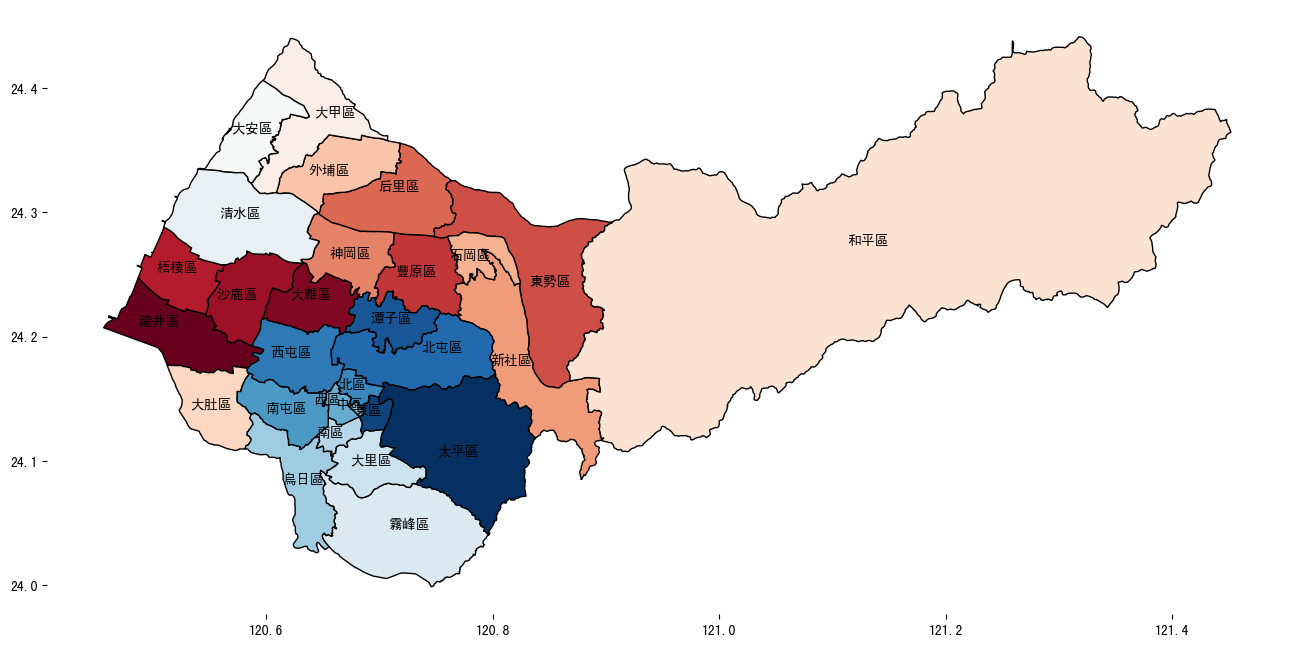

In [17]:
taichung_town_shp=town_shp[town_shp['COUNTYNAME']=='臺中市']

#重設 index => 解決 taichung_town_shp的index 與 enumerate() 不匹配問題
taichung_town_shp =taichung_town_shp.reset_index()

taichung_town_shp.plot(figsize=(16, 8),cmap='RdBu', edgecolor='k')
plt.rcParams['font.sans-serif'] = ['SimHei']

taichung_town_shp['coords'] = taichung_town_shp['geometry'].apply(lambda x: x.representative_point().coords[0])

# 地圖標註
for n, i in enumerate(taichung_town_shp['coords']):
    plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容

plt.box(False)


In [18]:
Taichung = taichung_town_shp.merge(df_District_sum, left_on=('TOWNNAME'), right_on=('District'))
Taichung.head(2)

,index,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,coords,District,Sum
0,40,B25,66000250,臺中市,龍井區,Longjing District,B,66000,"POLYGON ((120.48718 24.24761, 120.48785 24.246...","(120.50666237795349, 24.209110149264006)",龍井區,47298
1,41,B18,66000180,臺中市,大雅區,Daya District,B,66000,"POLYGON ((120.63446 24.25916, 120.63500 24.259...","(120.64164637428009, 24.230364189156035)",大雅區,42567


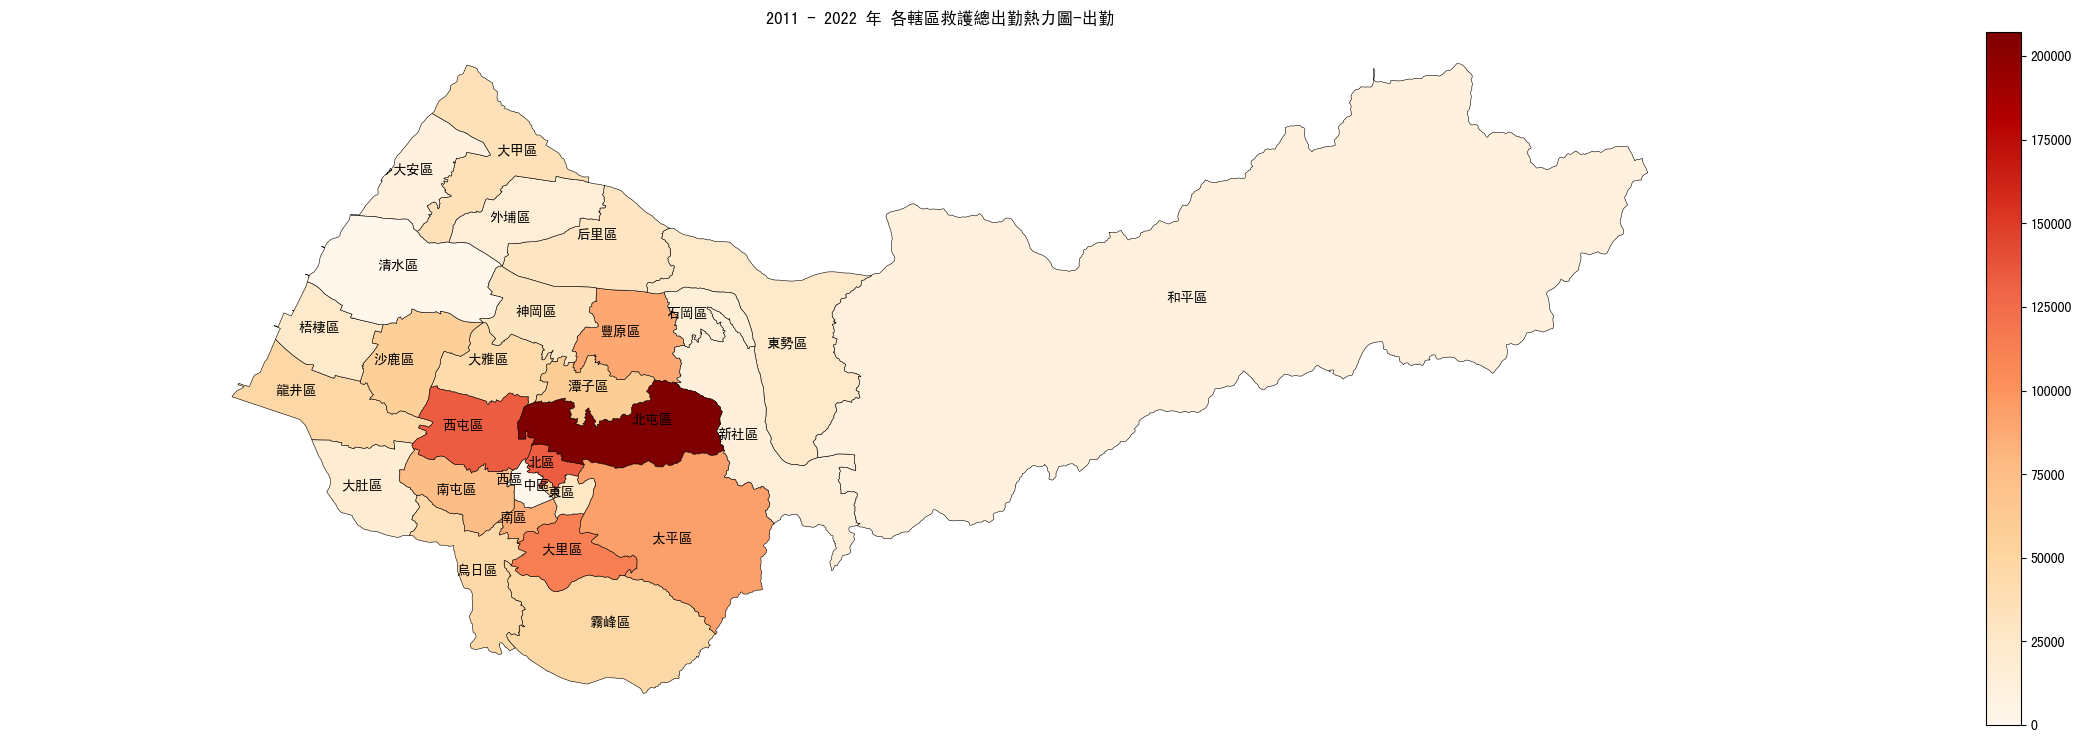

In [19]:
fig, ax = plt.subplots(figsize=(30, 9), dpi=100)

Taichung.plot(ax=ax, column="Sum", cmap="OrRd",edgecolor="k", linewidth=0.4, legend=True)
ax.axis("off")
plt.axis('equal')

plt.title('2011 - 2022 年 各轄區救護總出勤熱力圖-出勤')


# 地圖標註
for n, i in enumerate(taichung_town_shp['coords']):
    plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容
plt.show()

    

#### 各年分隊出勤統計 (2011 - 2022 (多 - 少))

{'中區': 4424, '南區': 6608, '東區': 2692, '北區': 9975, '西區': 0, '南屯區': 5341, '西屯區': 8591, '北屯區': 15801, '太平區': 7769, '大里區': 6517, '霧峰區': 3684, '烏日區': 3205, '大肚區': 1422, '龍井區': 3581, '梧棲區': 2160, '沙鹿區': 4338, '大雅區': 3596, '潭子區': 4106, '神岡區': 2792, '豐原區': 7519, '大甲區': 2763, '外埔區': 1315, '大安區': 727, '后里區': 2196, '石岡區': 1206, '新社區': 1145, '東勢區': 1965, '和平區': 911, '清水區': 0}
{'中區': 4244, '南區': 6539, '東區': 2733, '北區': 9846, '西區': 0, '南屯區': 4944, '西屯區': 8325, '北屯區': 15547, '太平區': 7835, '大里區': 9420, '霧峰區': 3686, '烏日區': 3490, '大肚區': 1479, '龍井區': 3463, '梧棲區': 1931, '沙鹿區': 4425, '大雅區': 3422, '潭子區': 3717, '神岡區': 2794, '豐原區': 7220, '大甲區': 2737, '外埔區': 1256, '大安區': 783, '后里區': 2197, '石岡區': 1276, '新社區': 1125, '東勢區': 1888, '和平區': 833, '清水區': 0}
{'中區': 4405, '南區': 6789, '東區': 2728, '北區': 11079, '西區': 0, '南屯區': 5039, '西屯區': 8876, '北屯區': 16494, '太平區': 7169, '大里區': 9344, '霧峰區': 3656, '烏日區': 3418, '大肚區': 1422, '龍井區': 3438, '梧棲區': 1909, '沙鹿區': 4382, '大雅區': 3647, '潭子區': 3174, '神岡區': 2607, '豐原區': 7137, '大甲區': 2774, 

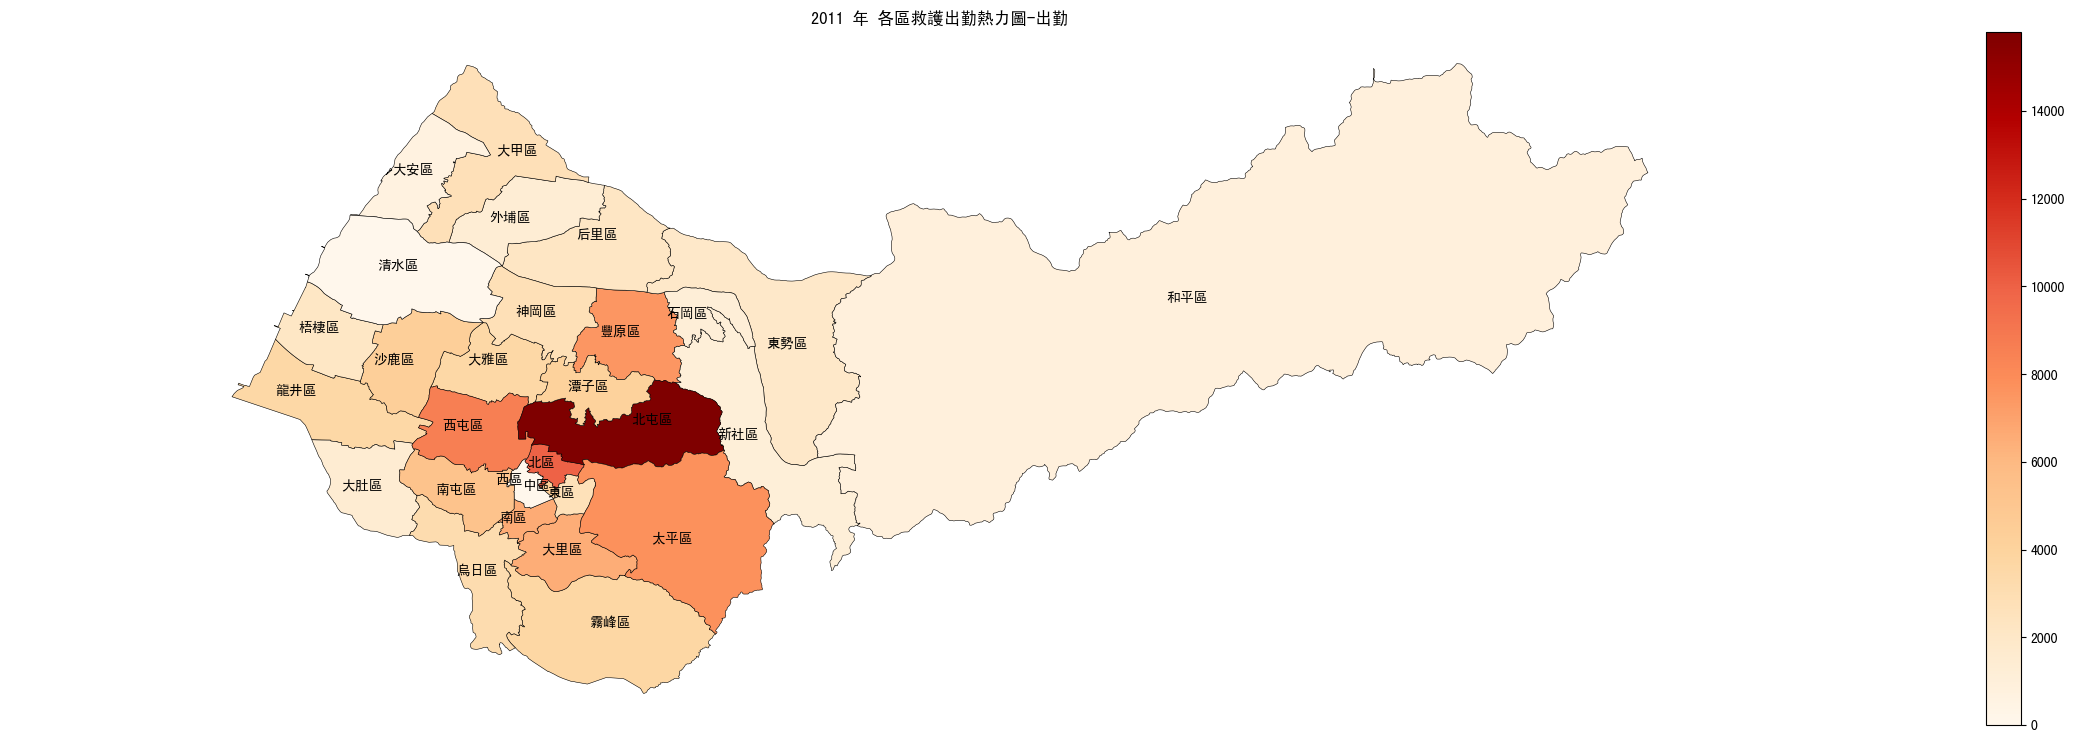

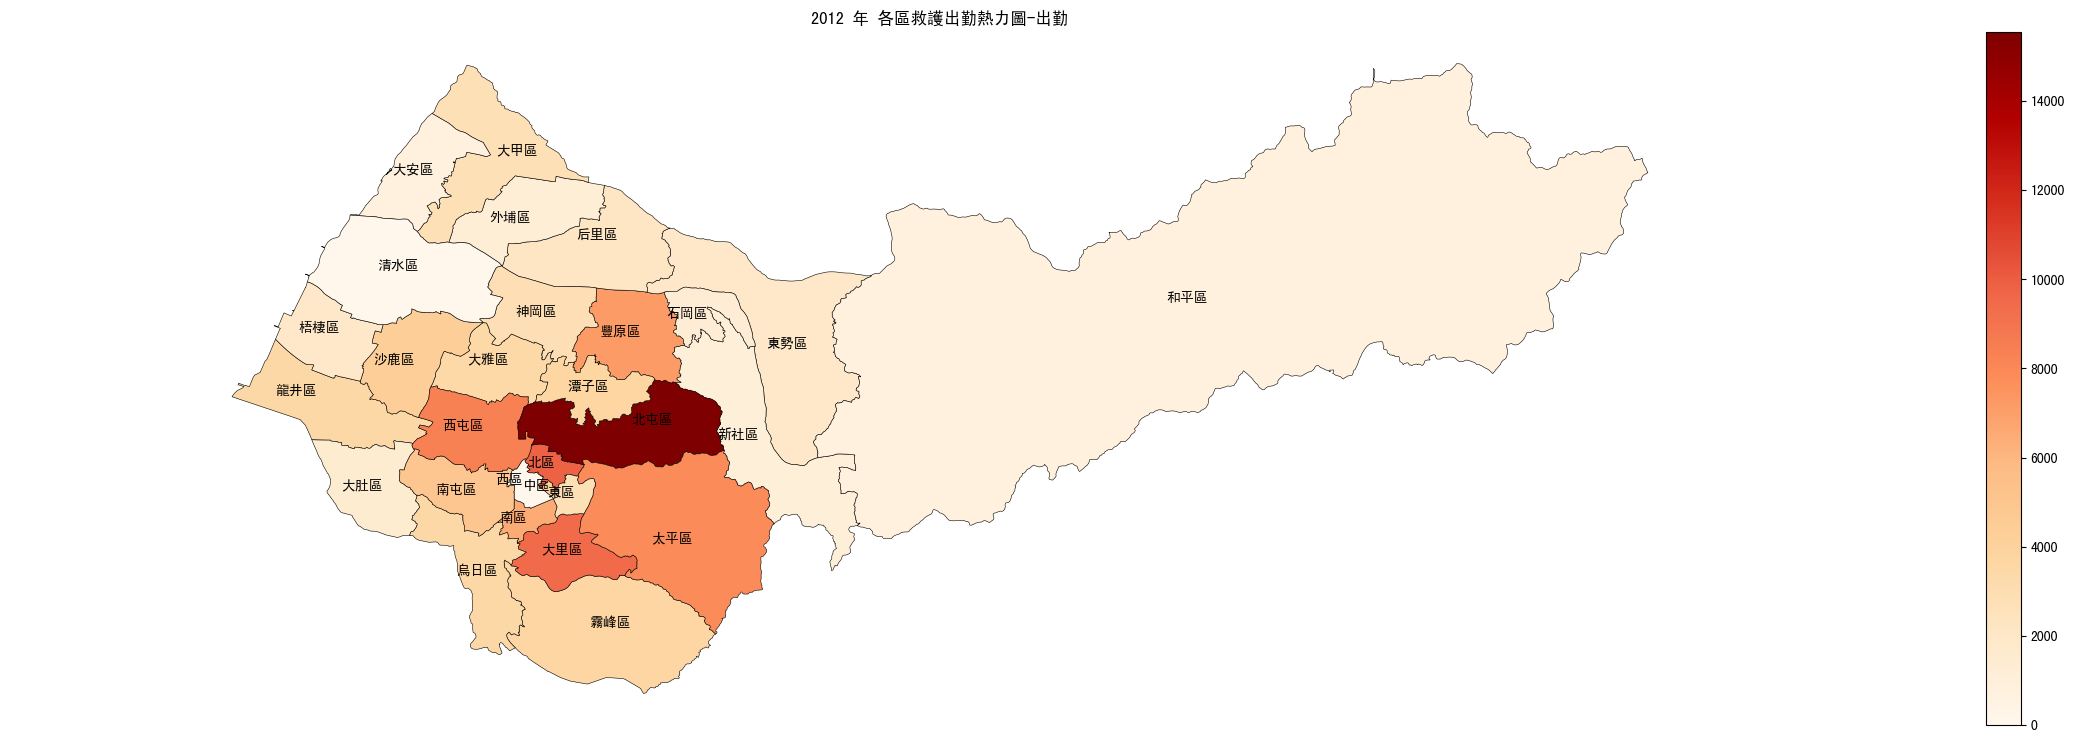

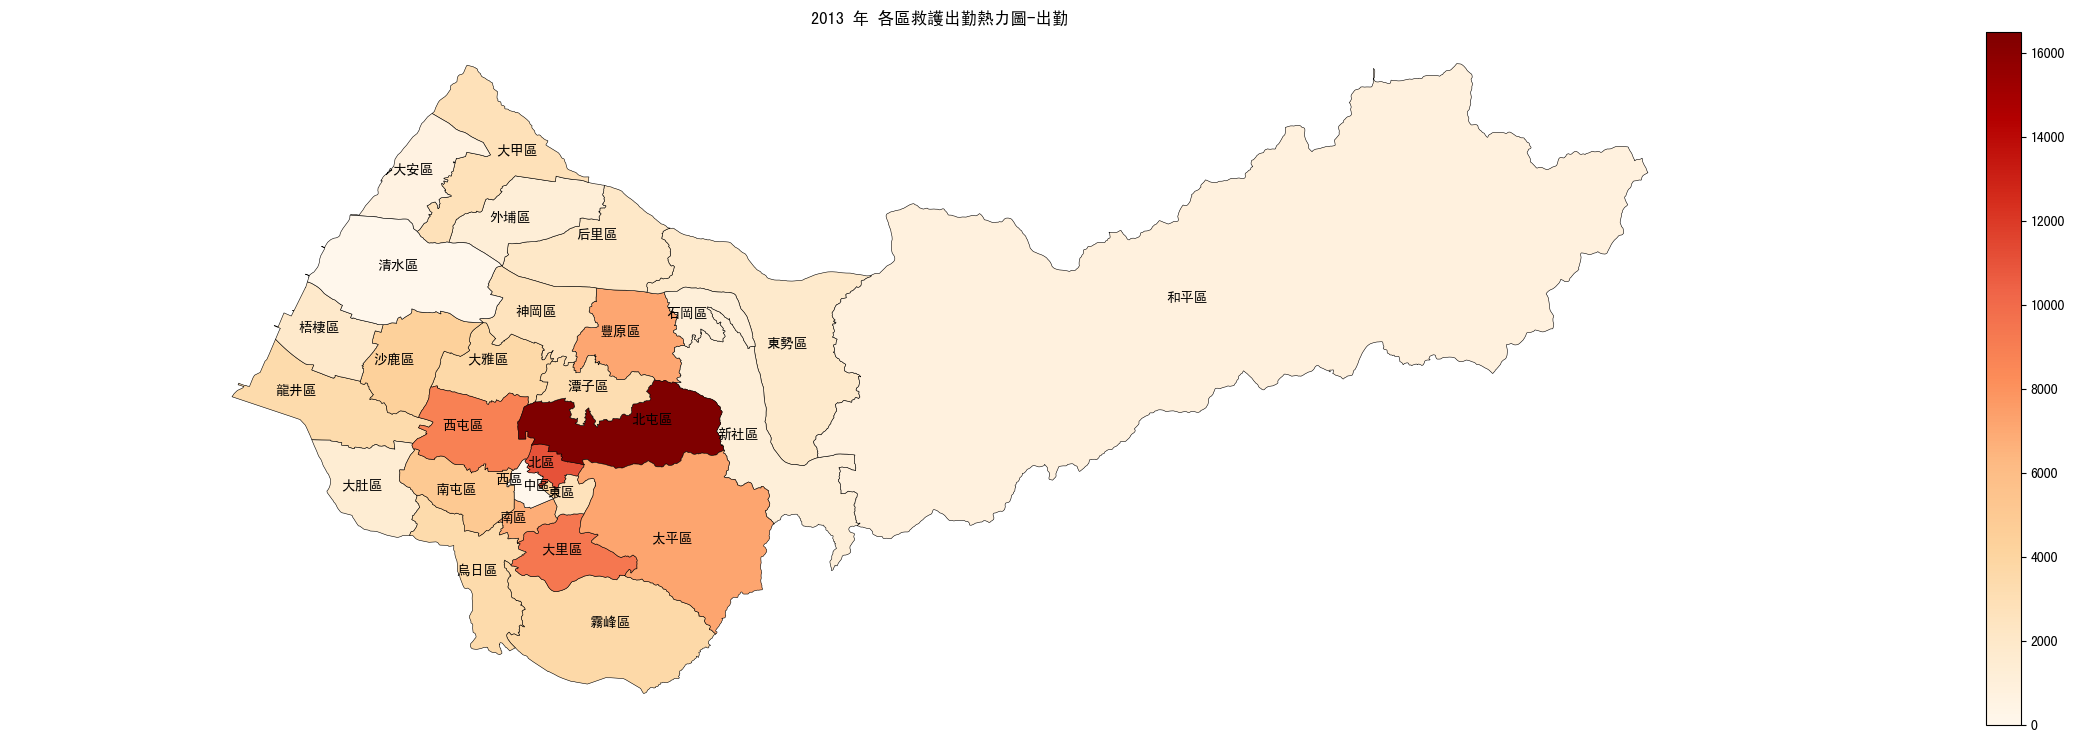

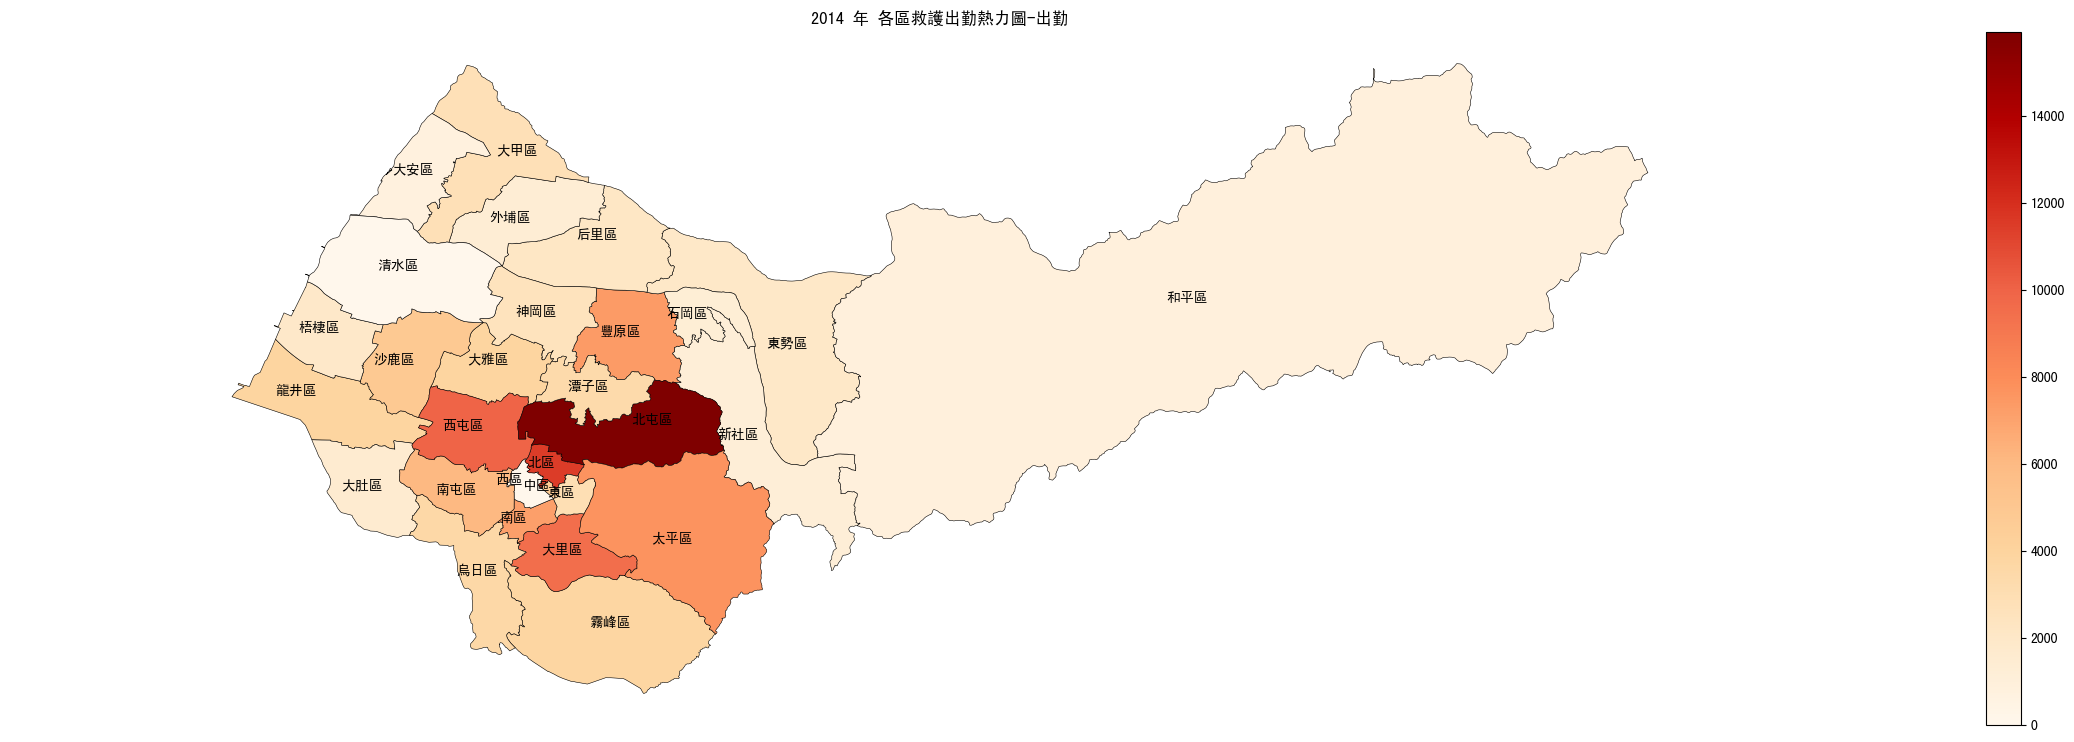

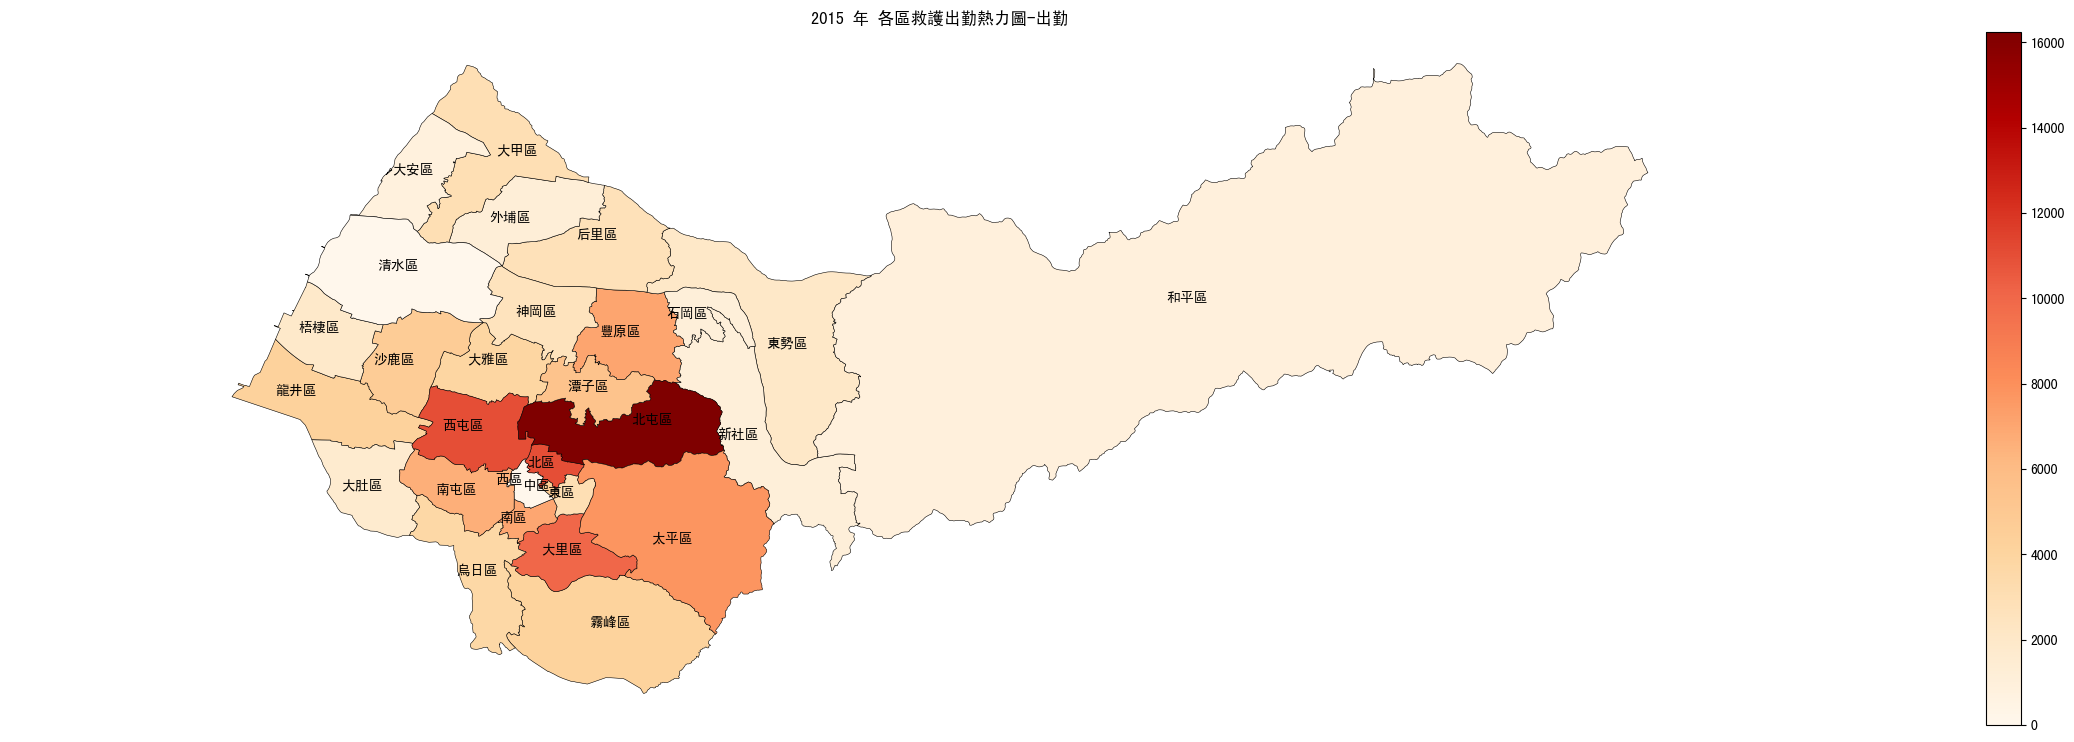

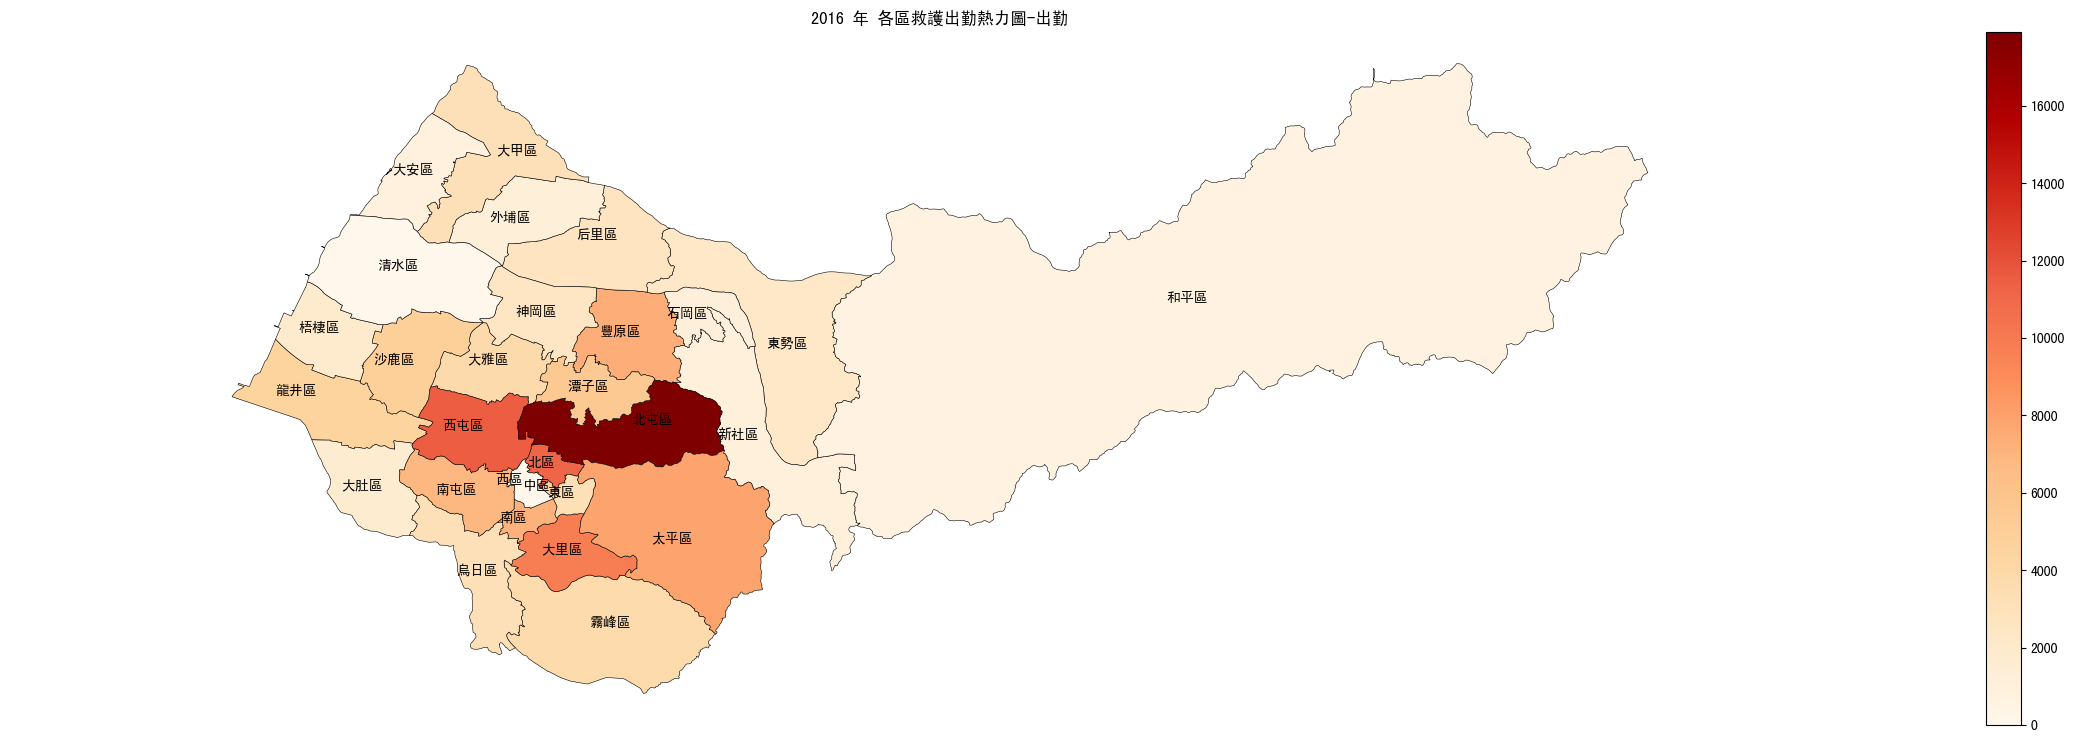

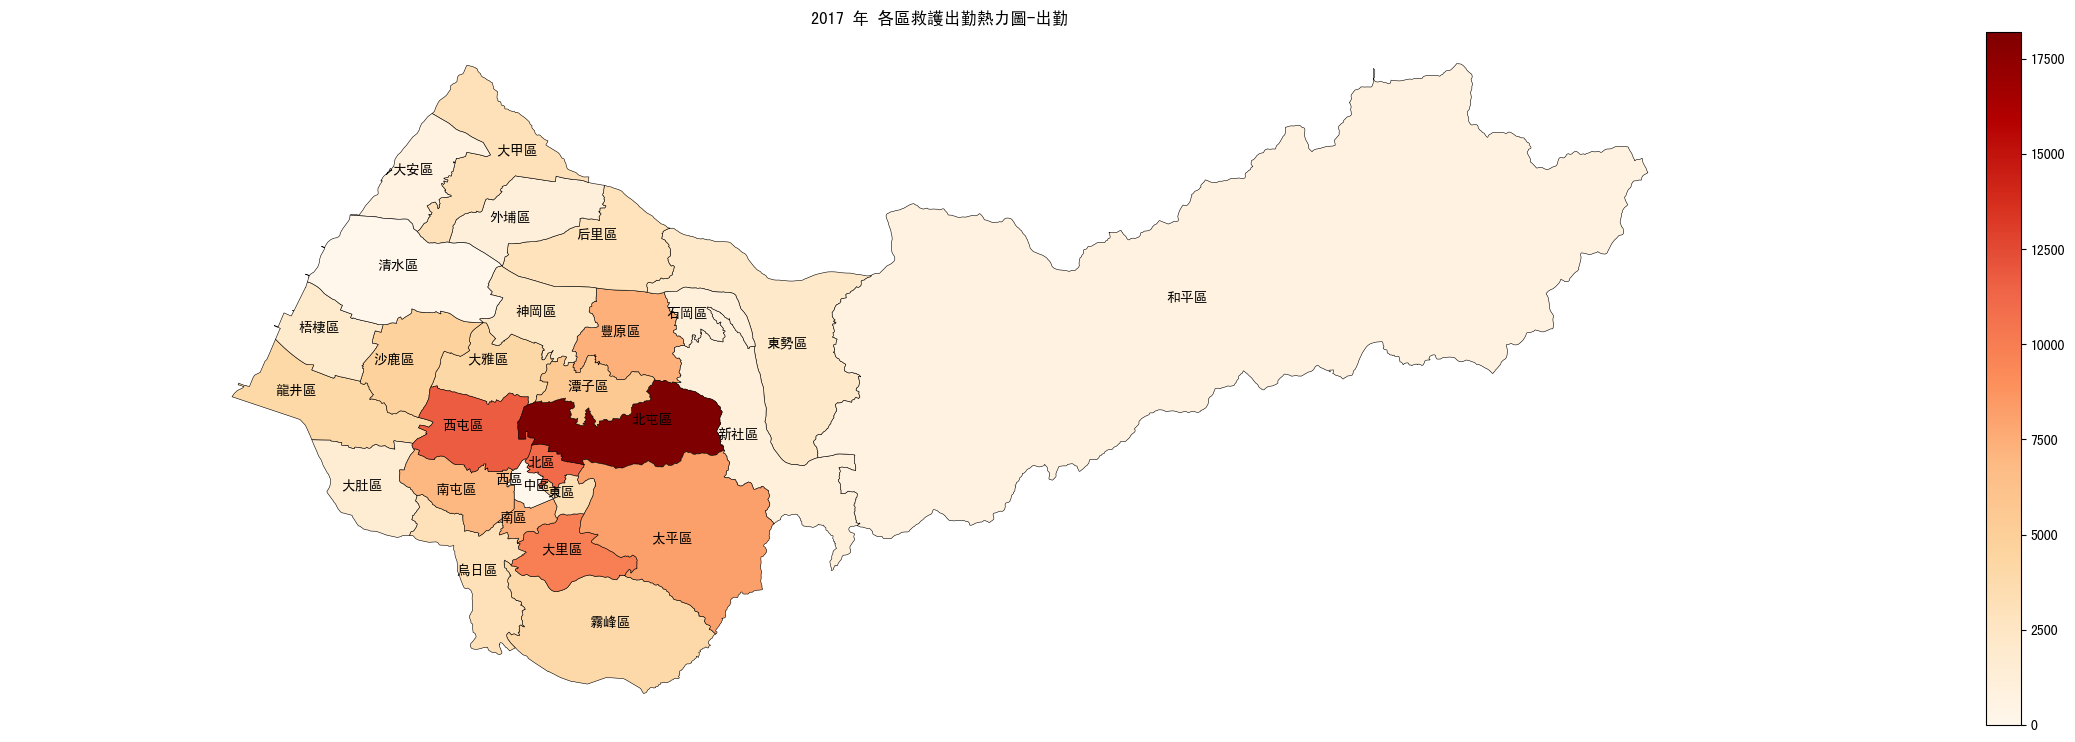

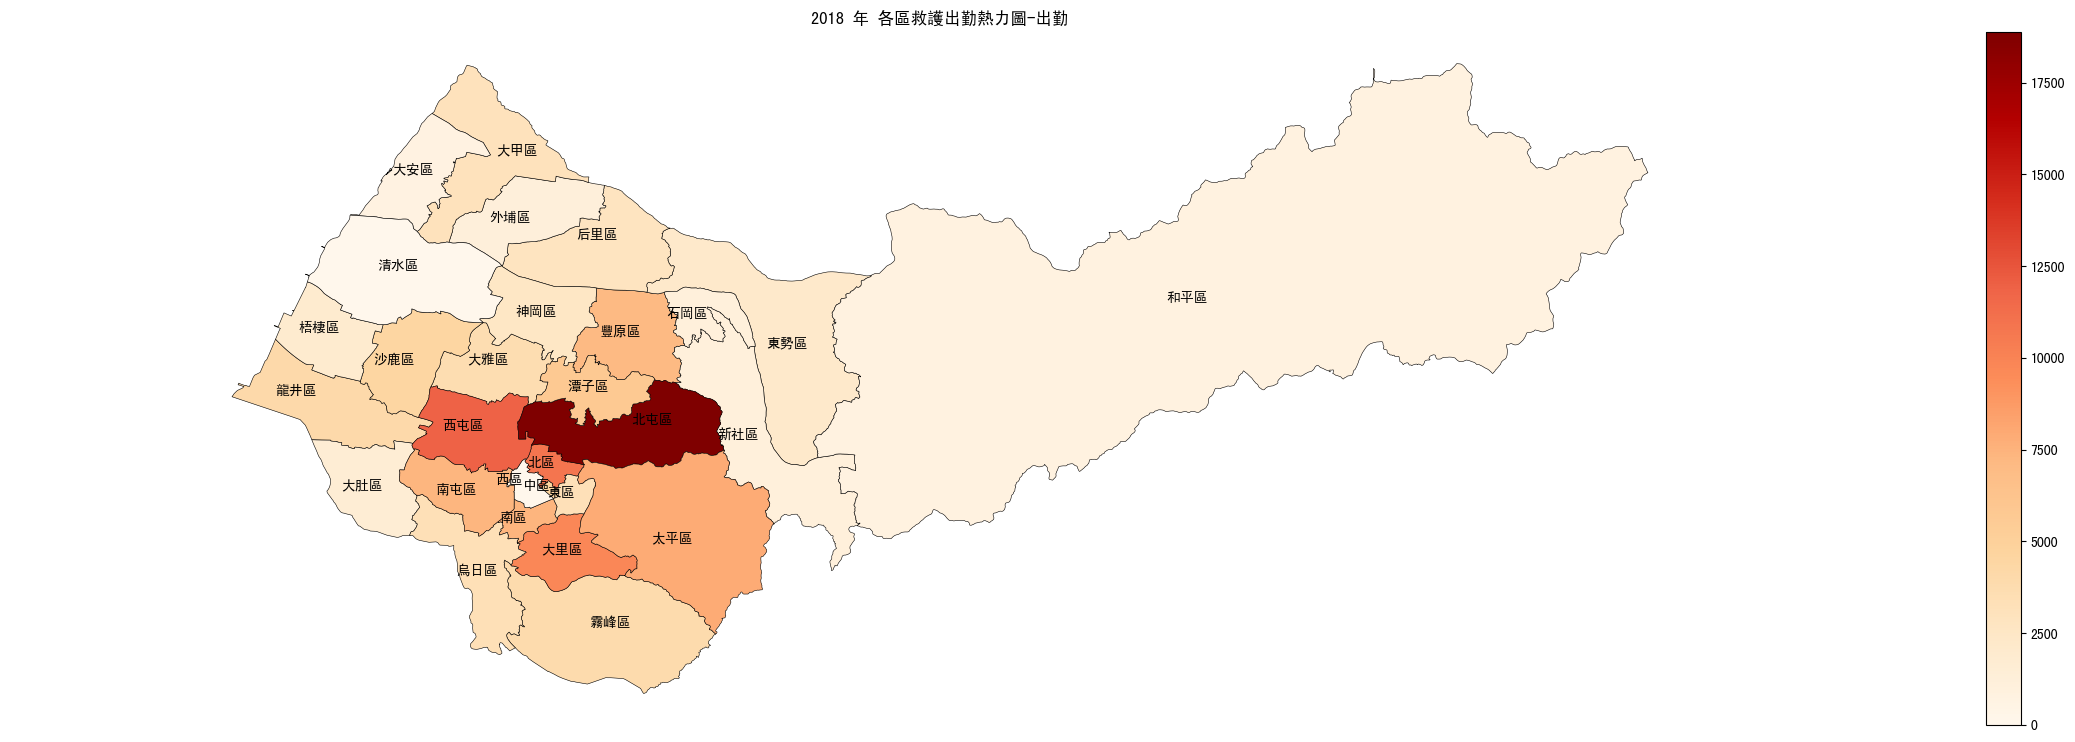

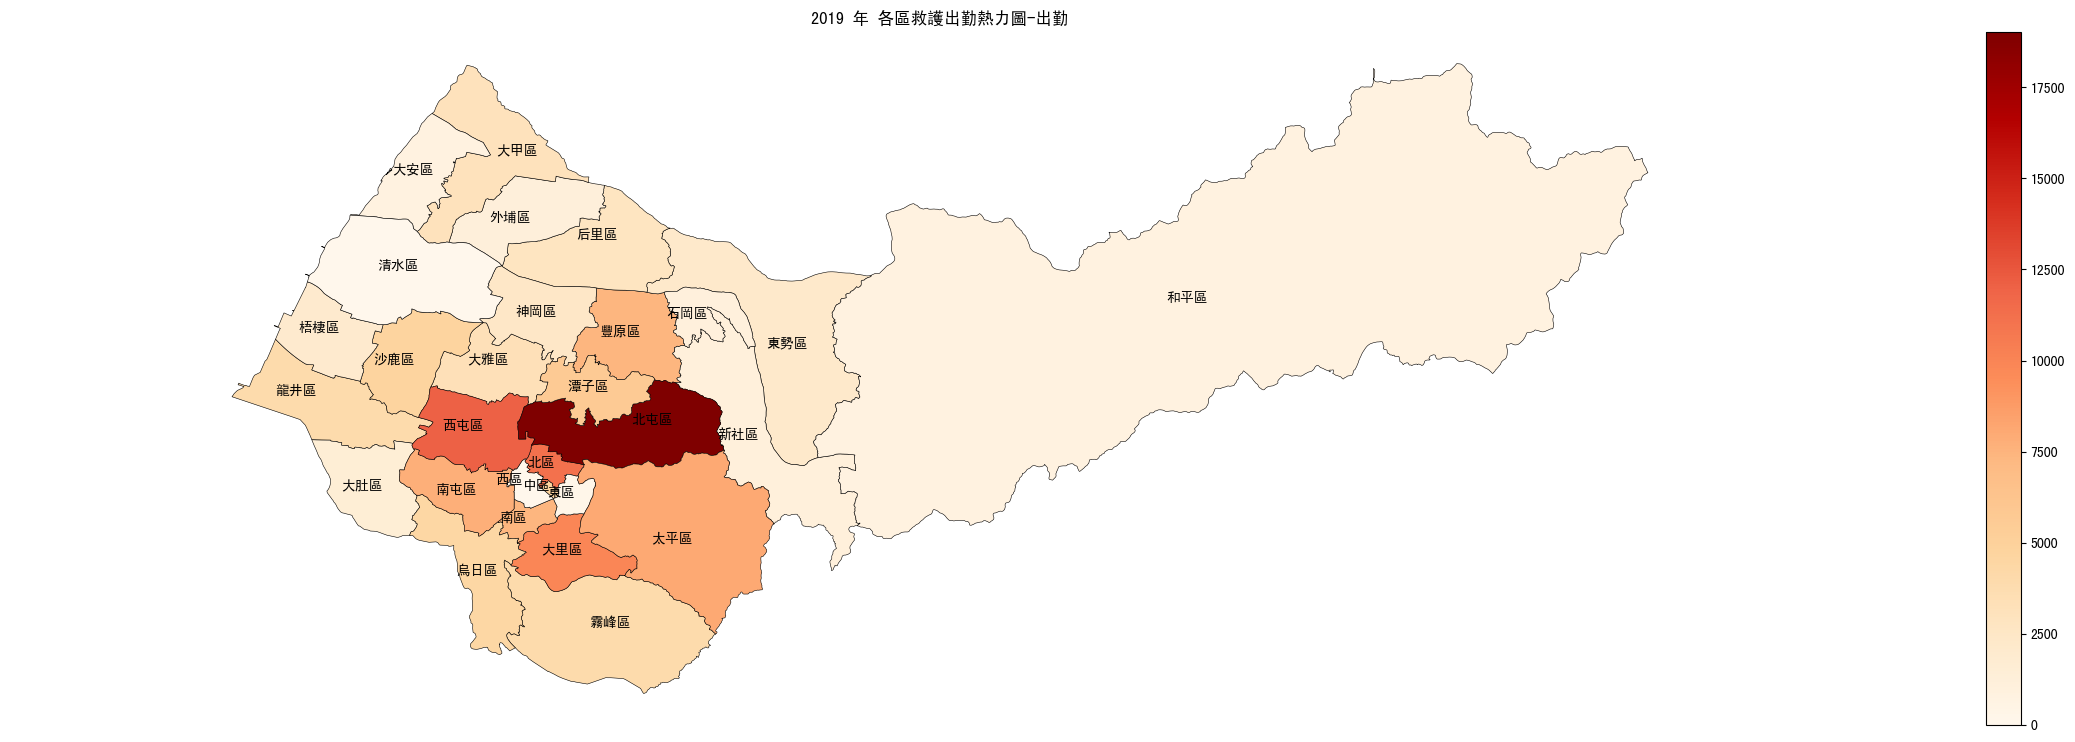

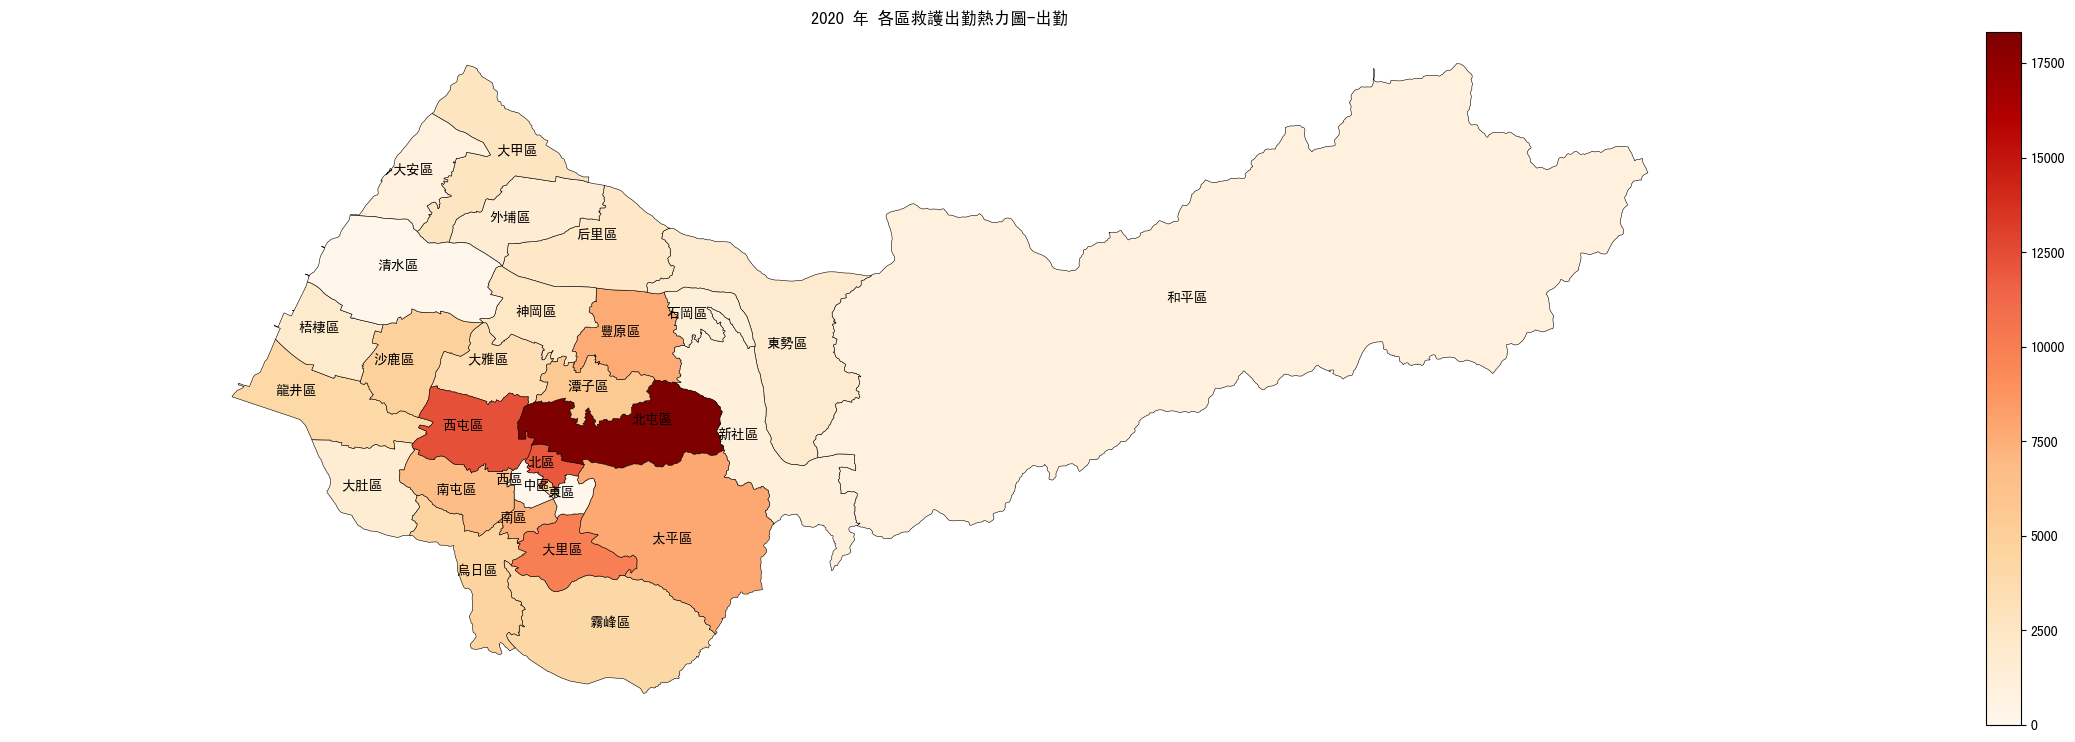

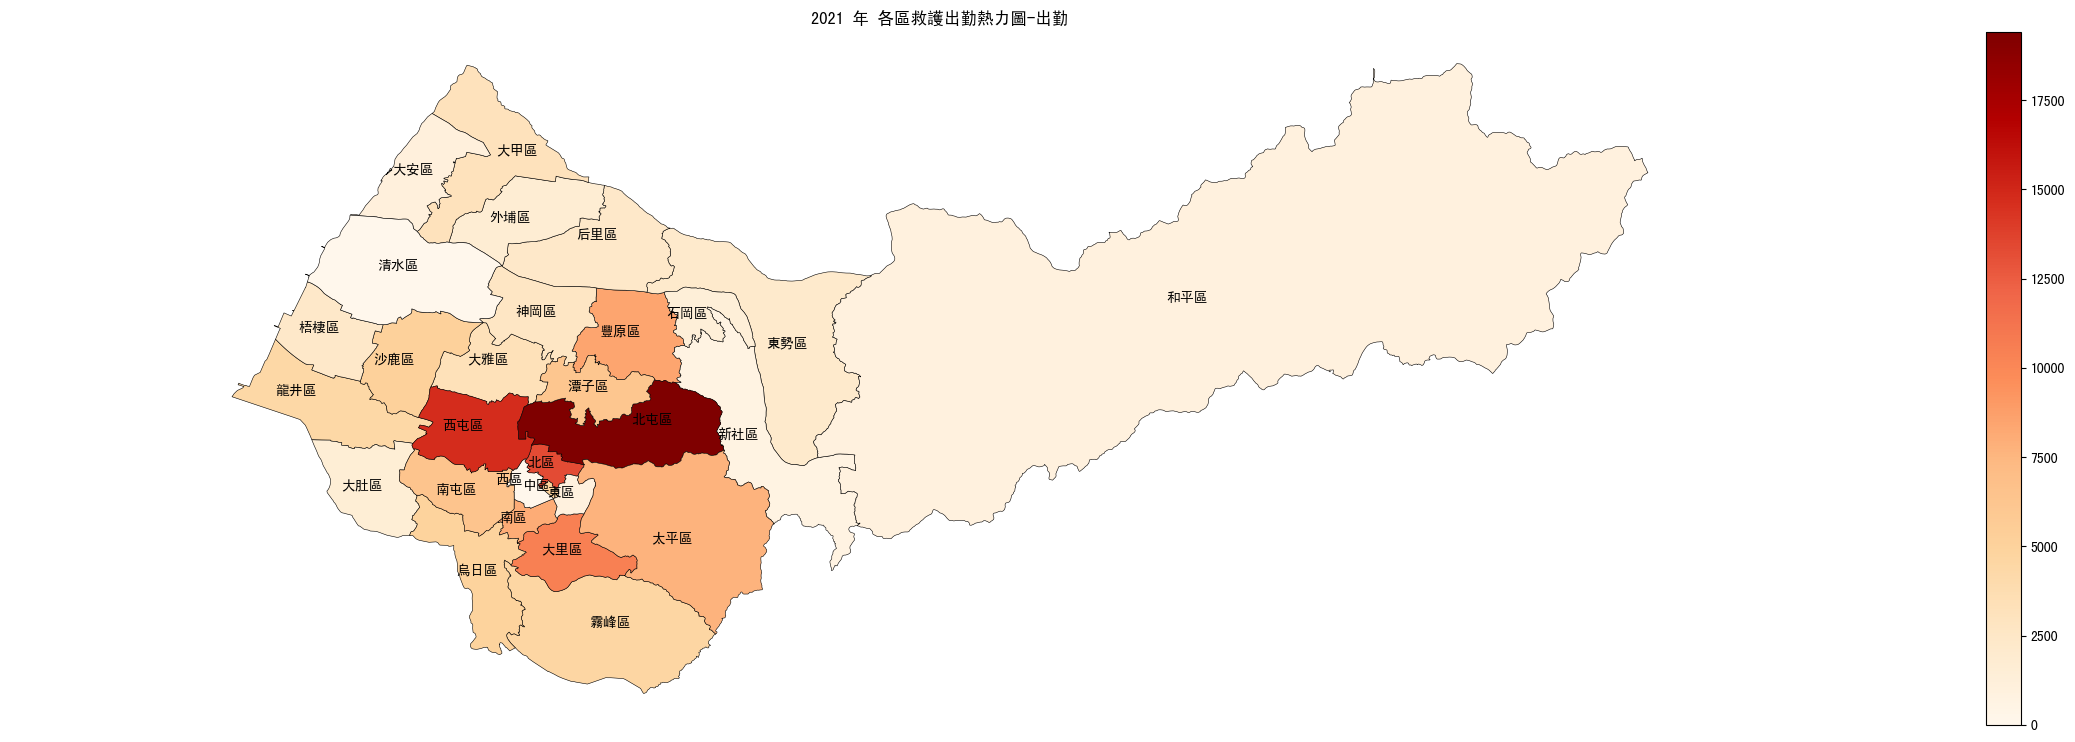

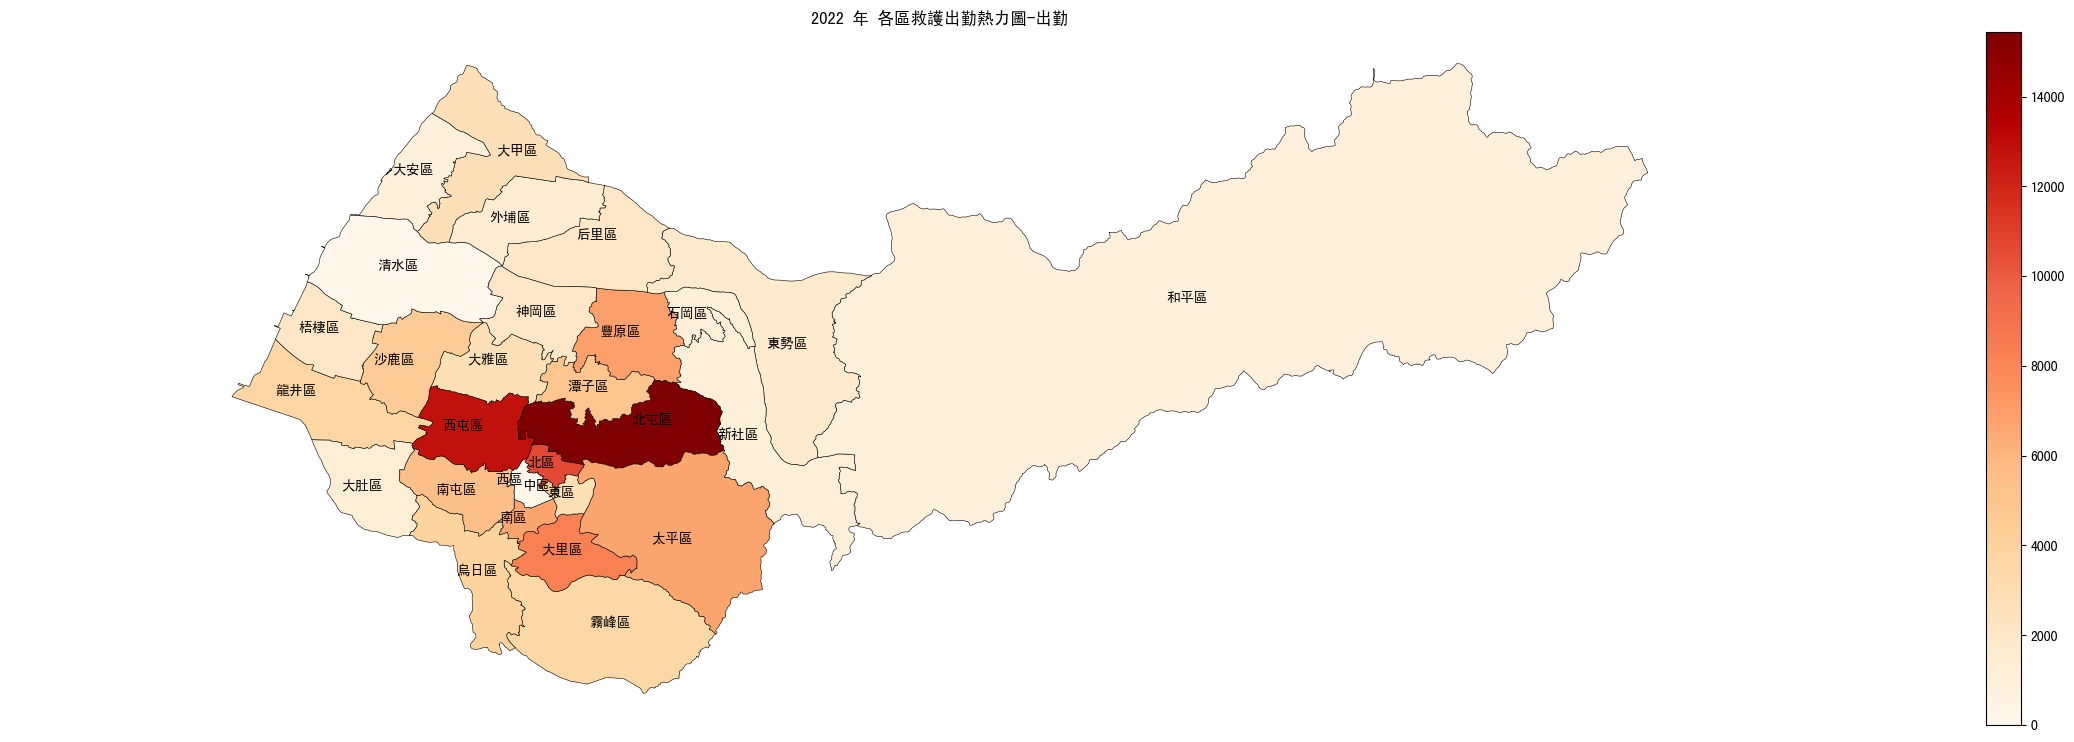

In [130]:
for year in years:
    District_sum_init = {k:0 for k in District_sum.keys()}
    mask  = address_df['year'] == int(year)
    class_Counter = function_api.count(address_df[mask], counter_colName)
    # print(class_Counter)

    team_data=address_df[mask][counter_colName].apply(lambda t: t[7:])
    for item in team_data:
        for item_dict in District_dict:
            if item in District_dict[item_dict]:
                District_sum_init[item_dict] += 1
            else:
                pass
    print(District_sum_init)
    
    df_District_sum = pd.DataFrame(list(District_sum_init.items()),columns=['District', 'Sum'], index=None)
    Taichung = taichung_town_shp.merge(df_District_sum, left_on=('TOWNNAME'), right_on=('District'))
    Taichung.head()
    fig, ax = plt.subplots(1, figsize=(30, 9), dpi=100)


    plt.title('{} 年 各區救護出勤熱力圖-出勤'.format(year))
    taichung_town_shp['coords'] = taichung_town_shp['geometry'].apply(lambda x: x.representative_point().coords[0])

    Taichung.plot(ax=ax, column="Sum", cmap="OrRd",edgecolor="k", linewidth=0.4, legend=True)
    ax.axis("off")
    plt.axis('equal')


    # 地圖標註
    for n, i in enumerate(taichung_town_shp['coords']):
        plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容
    

#### 篩選送醫資料

###### eDisposition.T07 - 送醫/未運送原因
![RUNOOB 图标](../img/eDisposition_T07.png)

In [20]:
counter_colName = 'eDispositionT07' # 送醫/未送醫原因

In [21]:
# 類別總數
class_Counter = function_api.count(address_df, counter_colName)
print(class_Counter)

Counter({7701003: 1127361, 128007: 224789, 128001: 155394, 128002: 37946, 128004: 36693, 128010: 21959, 128011: 11350, 128009: 8201, 128006: 4948, 128008: 3870, 128003: 3498, 128005: 2237})


###### 篩選出送醫的資料欄位 datafrmae Name = sendTo_hospital

In [22]:
sendTo_hospital = address_df.loc[address_df['eDispositionT07'] == 128001] # 送醫
sendTo_hospital
# sendTo_hospital.to_csv('../part3/hospital.csv', index=False)


,year,eRecordT01,eDispositionT09,eResponseT03,eDispositionT07,eSceneT01
170,2011,2011010110100410001664,7701003,101004_豐原91,128001,NaN
195,2011,2011010110100410001689,7701003,101004_大甲91,128001,NaN
199,2011,2011010110100410001693,7701003,101004_大甲91,128001,NaN
200,2011,2011010110100410001694,7701003,101004_大甲91,128001,NaN
214,2011,2011010110100410001708,7701003,101004_梧棲91,128001,NaN
...,...,...,...,...,...,...
1638241,2022,2022123110100464733007,129001,101016_大肚91,128001,台中市大肚區沙田路二段467號
1638242,2022,2022123110100470855007,7701001,101016_大誠91,128001,台中市北區三民路三段89巷2號
1638243,2022,2022123110100480227014,129001,101016_十九甲91,128001,台中市大里區勝利二路60號
1638244,2022,2022123110100484605014,129001,101016_中區91,128001,台中市北區崇德路一段和錦中街的交叉路口


##### 建構各分隊地理位置及經緯度字典

In [61]:
import requests
import re
from bs4 import BeautifulSoup

teamName = list()
teamsLocation =list()
teams_location = dict()
teams_case = dict()

for page in range(1, 8):
    url='https://www.fire.taichung.gov.tw/content/index.asp?Parser=7,3,101,21,,,,,,,{}'.format(page)

    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    text = soup.prettify() #text 包含了html的內容
    reservoir = soup.select('.list_date')

    for i in reservoir:
        team = i.find_all('span')[0].get_text()
        teamName.append(team)
        rename = re.sub("分隊","",team)
        address = i.find_all('span')[3].find('a').get_text()
        teamsLocation.append(address)
        teams_location[rename] = address
        teams_case[team] = 0

print(teams_location)
print(teams_case)

{'第一大隊': '豐原區圓環北路一段321號', '豐原': '豐原區圓環北路一段321號', '潭子': '潭子區中山路二段237巷3號', '大雅': '大雅區學府路80號', '神岡': '神岡區北庄里厚生路9號', '頭家厝': '潭子區家福里得天南街37巷55號', '豐南': '豐原區育英路150號', '第二大隊': '東勢區東關路七段430號3樓', '東勢': '東勢區東關路七段430號1樓', '新社': '新社區新社里興安路1號', '石岡': '石岡區石岡里豐勢路1171號', '和平': '和平區南勢里東關路三段157號', '梨山': '和平區復興路松柏巷42號', '雙崎': '和平區自由里東崎路二段39號', '谷關': '和平區東關路一段119號', '第三大隊': '大里區國光路二段299號3樓', '仁化': '大里區工業四路1號', '霧峰': '霧峰區吉峰路18號', '大里': '大里區大里路289號', '太平': '太平區中興東路46號', '烏日': '烏日區新興路312號', '中山': '太平區中山路四段23號', '十九甲': '大里區立元路26號', '溪湳': '烏日區溪南路一段823巷59號', '車籠埔': '太平區光興路1463巷33弄67號', '第四大隊': '沙鹿區鎮南路二段476號', '沙鹿': '沙鹿區鎮南路二段476號', '清水': '清水區南社路198號', '梧棲': '梧棲區四維路一段1號', '大肚': '大肚區沙田路三段40號', '龍井': '龍井區沙田路四段183號', '犁份': '龍井區西屯路四段830巷30號', '清泉': '沙鹿區公明里中清路六段119號', '第五大隊': '大甲區經國路695號', '幼獅': '大甲區日南里幼二路32巷1號', '大甲': '大甲區經國路695號', '外埔': '外埔區大同里六分路348號', '后里': '后里區墩東里文明路146號', '大安': '大安區中山南路199號', '第六大隊': '南屯區向心南路916號', '黎明': '西屯區青海路二段120號', '南屯': '南屯區向心南路916號', '協和': '西屯區台灣大道四段1347號', '工業區': '西屯區工業區二十七路15號', '春社': '南

#### 建構分隊資料表

###### 獲取經緯度

In [24]:
address = list()
# result_loaction = [24.2555322,120.7173055],[24.2555322,120.7173055],[24.2094958,120.6940662],[24.2184233,120.6405387], [24.2569204,120.6607187], [24.1932819,120.6908975], [24.2408617,120.7047539],[24.2596032,120.8135963],[24.2596032,120.8135963],[24.2402384,120.7974858], [24.2766197,120.7649653], [24.1743925,120.8736144], [24.257891,121.2623378], [24.291681,120.898849], [24.2029929,120.9969442], [24.1071881,120.6697915],[24.0946401,120.704193],[24.0755874,120.6902913],[24.097606,120.6683813],[24.1295831,120.7093217],[24.1045228,120.6141393],[24.1495673,120.7026001],[24.0995449,120.684872],[24.0695875,120.6336467],[24.1249662,120.7230772],[24.2325319,120.5555875],[24.2325319,120.5555875],[24.2663463,120.5520993],[24.2642666,120.5280633],[24.1550979,120.5340289],[24.1911201,120.5353463],[24.1890678,120.5799656],[24.2445568,120.6023063],[24.355422,120.6088807],[24.4052406,120.6367169],[24.355422,120.6088807],[24.332324,120.6452165],[24.3070139,120.7076322],[24.3434965,120.5780898],[24.1358516,120.6337997],[24.167641,120.638856],[24.1358516,120.6337997],[24.1839085,120.5985548],[24.1661108,120.5905417],[24.1472067,120.5950977],[24.1540915,120.6553676],[24.1540915,120.6553676],[24.1318504,120.6738068],[24.144738,120.6682474],[24.1122022,120.6404921],[24.1414708,120.6942799],[24.1540915,120.6553676],[24.1875775,120.6608274],[24.1705274,120.6702892],[24.1631154,120.6830906],[24.1926349,120.6716203],[24.1876121,120.650524],[24.1727136,120.7119744],[24.1545898,120.6768165],[24.1071881,120.6697915],[24.1810244,120.6276215],[24.1545898,120.6768165],[24.0431165,120.6849309]

result_loaction = [(24.2555322,120.7173055),(24.2555322,120.7173055),(24.2094958,120.6940662),(24.2184233,120.6405387), (24.2569204,120.6607187), (24.1932819,120.6908975), (24.2408617,120.7047539),(24.2596032,120.8135963),(24.2596032,120.8135963),(24.2402384,120.7974858), (24.2766197,120.7649653), (24.1743925,120.8736144), (24.257891,121.2623378), (24.291681,120.898849), (24.2029929,120.9969442), (24.1071881,120.6697915),(24.0946401,120.704193),(24.0755874,120.6902913),(24.097606,120.6683813),(24.1295831,120.7093217),(24.1045228,120.6141393),(24.1495673,120.7026001),(24.0995449,120.684872),(24.0695875,120.6336467),(24.1249662,120.7230772),(24.2325319,120.5555875),(24.2325319,120.5555875),(24.2663463,120.5520993),(24.2642666,120.5280633),(24.1550979,120.5340289),(24.1911201,120.5353463),(24.1890678,120.5799656),(24.2445568,120.6023063),(24.355422,120.6088807),(24.4052406,120.6367169),(24.355422,120.6088807),(24.332324,120.6452165),(24.3070139,120.7076322),(24.3434965,120.5780898),(24.1358516,120.6337997),(24.167641,120.638856),(24.1358516,120.6337997),(24.1839085,120.5985548),(24.1661108,120.5905417),(24.1472067,120.5950977),(24.1540915,120.6553676),(24.1540915,120.6553676),(24.1318504,120.6738068),(24.144738,120.6682474),(24.1122022,120.6404921),(24.1414708,120.6942799),(24.1540915,120.6553676),(24.1875775,120.6608274),(24.1705274,120.6702892),(24.1631154,120.6830906),(24.1926349,120.6716203),(24.1876121,120.650524),(24.1727136,120.7119744),(24.1545898,120.6768165),(24.1071881,120.6697915),(24.1810244,120.6276215),(24.1545898,120.6768165),(24.0431165,120.6849309)]


###### 12年(有)送醫分隊統計-車輛

In [62]:
# District_sum_init = {k:0 for k in District_sum.keys()}
# mask  = sendTo_hospital['year'] == int(year)
class_Counter = function_api.count(sendTo_hospital, 'eResponseT03')
print(class_Counter)

Counter({'101004_沙鹿91': 6367, '101004_大甲91': 4158, '101016_北屯91': 4069, '101016_黎明91': 4026, '101016_信義91': 3948, '101016_中區91': 3932, '101016_文昌91': 3806, '101016_中港91': 3788, '101016_南屯91': 3723, '101016_豐原91': 3645, '101016_豐南91': 3523, '101016_大誠91': 3462, '101016_國光91': 2992, '101016_中山91': 2981, '101016_勤工91': 2930, '101016_四平91': 2896, '101004_梧棲91': 2888, '101016_西屯91': 2885, '101016_中港93': 2883, '101016_東英91': 2850, '101016_潭子91': 2849, '101016_大雅91': 2842, '101016_霧峰91': 2787, '101016_水湳91': 2698, '101004_清水91': 2637, '101016_協和91': 2587, '101016_烏日91': 2412, '101016_太平91': 2383, '101016_十九甲91': 2358, '101016_東山91': 2352, '101016_頭家厝91': 2304, '101016_沙鹿91': 2147, '101016_神岡91': 2084, '101016_后里91': 2074, '101016_清水91': 1940, '101016_犁份91': 1919, '101016_黎明92': 1913, '101016_東勢91': 1861, '101016_仁化91': 1810, '101016_大里91': 1716, '101016_春社91': 1688, '101016_清泉91': 1532, '101016_梧棲91': 1476, '101016_大甲91': 1419, '101016_龍井91': 1376, '101016_大肚91': 1362, '101016_外埔91': 1305, '1

###### 12年(有)送醫分隊統計-分隊

In [64]:
team_data = sendTo_hospital['eResponseT03'].apply(lambda t: t[7:])

for i in team_data:
    data = i.split('9')[0] + '分隊'

    for item_dict in teams_case:
        if data == item_dict:
            teams_case[item_dict] += 1
        else:
            pass
print(teams_case)

{'第一大隊': 0, '豐原分隊': 4319, '潭子分隊': 2960, '大雅分隊': 3488, '神岡分隊': 2196, '頭家厝分隊': 2309, '豐南分隊': 3929, '第二大隊': 0, '東勢分隊': 2168, '新社分隊': 1298, '石岡分隊': 1228, '和平分隊': 315, '梨山分隊': 229, '雙崎分隊': 187, '谷關分隊': 257, '第三大隊': 0, '仁化分隊': 1847, '霧峰分隊': 3767, '大里分隊': 2278, '太平分隊': 3034, '烏日分隊': 3402, '中山分隊': 4410, '十九甲分隊': 2369, '溪湳分隊': 1063, '車籠埔分隊': 1193, '第四大隊': 0, '沙鹿分隊': 8858, '清水分隊': 4896, '梧棲分隊': 4364, '大肚分隊': 1511, '龍井分隊': 2591, '犁份分隊': 2855, '清泉分隊': 2106, '第五大隊': 0, '幼獅分隊': 1468, '大甲分隊': 5815, '外埔分隊': 2310, '后里分隊': 2437, '大安分隊': 1769, '第六大隊': 0, '黎明分隊': 6343, '南屯分隊': 4444, '協和分隊': 2976, '工業區分隊': 1153, '春社分隊': 1691, '第七大隊': 0, '中港分隊': 7586, '信義分隊': 3971, '中區分隊': 4435, '勤工分隊': 2969, '東英分隊': 2883, '專責救護隊': 0, '第八大隊': 0, '文昌分隊': 4576, '北屯分隊': 4617, '四平分隊': 2938, '水湳分隊': 2724, '東山分隊': 2633, '特搜大隊': 0, '國光分隊': 3508, '西屯分隊': 2907, '大誠分隊': 3486, '搜救犬隊': 0}


In [71]:
# Dict 轉 dataFrame
df_teams_case = pd.DataFrame(list(teams_case.items()),columns=['Team', 'Case'], index=None)
df_teams_case.head(2)

,Team,Case
0,第一大隊,0
1,豐原分隊,4319


In [75]:
teamInfo = pd.DataFrame(list(zip(teamName, teamsLocation, result_loaction)),columns =['Team', 'Address','geometry'])
teamInfo = teamInfo.merge(df_teams_case, on='Team', how='right')
teamInfo.head(2)

,Team,Address,geometry,Case
0,第一大隊,豐原區圓環北路一段321號,"(24.2555322, 120.7173055)",0
1,豐原分隊,豐原區圓環北路一段321號,"(24.2555322, 120.7173055)",4319


##### 顯示各分分隊位置至地圖上

In [81]:
taichung_town_points = taichung_town_shp.copy()

world_map_axes = geoplot.polyplot(world, facecolor="lightgrey", alpha=0.5, figsize=(15, 10));

geoplot.pointplot(starbucks,
                  ax=world_map_axes,
                  color="tomato",
                  edgecolor="black",
                  alpha=0.5
                 );

AttributeError: 'GeoDataFrame' object has no attribute 'polyplot'

##### 12年有送醫分隊出勤總數

In [112]:
class_Counter = function_api.count(sendTo_hospital, 'eResponseT03')
print(class_Counter)

Counter({'101004_沙鹿91': 6367, '101004_大甲91': 4158, '101016_北屯91': 4069, '101016_黎明91': 4026, '101016_信義91': 3948, '101016_中區91': 3932, '101016_文昌91': 3806, '101016_中港91': 3788, '101016_南屯91': 3723, '101016_豐原91': 3645, '101016_豐南91': 3523, '101016_大誠91': 3462, '101016_國光91': 2992, '101016_中山91': 2981, '101016_勤工91': 2930, '101016_四平91': 2896, '101004_梧棲91': 2888, '101016_西屯91': 2885, '101016_中港93': 2883, '101016_東英91': 2850, '101016_潭子91': 2849, '101016_大雅91': 2842, '101016_霧峰91': 2787, '101016_水湳91': 2698, '101004_清水91': 2637, '101016_協和91': 2587, '101016_烏日91': 2412, '101016_太平91': 2383, '101016_十九甲91': 2358, '101016_東山91': 2352, '101016_頭家厝91': 2304, '101016_沙鹿91': 2147, '101016_神岡91': 2084, '101016_后里91': 2074, '101016_清水91': 1940, '101016_犁份91': 1919, '101016_黎明92': 1913, '101016_東勢91': 1861, '101016_仁化91': 1810, '101016_大里91': 1716, '101016_春社91': 1688, '101016_清泉91': 1532, '101016_梧棲91': 1476, '101016_大甲91': 1419, '101016_龍井91': 1376, '101016_大肚91': 1362, '101016_外埔91': 1305, '1

###### 統計送醫資料裡轄區總數

In [113]:
District_sum_init = {k:0 for k in District_sum.keys()}
counter_colName = "eResponseT03" # 派遣分隊
team_data=sendTo_hospital[counter_colName].apply(lambda t: t[7:])
for item in team_data:
    for item_dict in District_dict:
        if item in District_dict[item_dict]:
            District_sum_init[item_dict] += 1
            District_sum_init[item_dict]
        else:
            pass

print(District_sum_init)

{'中區': 3956, '南區': 6939, '東區': 2883, '北區': 10178, '西區': 0, '南屯區': 5448, '西屯區': 12647, '北屯區': 15920, '太平區': 7241, '大里區': 8966, '霧峰區': 3767, '烏日區': 4211, '大肚區': 1511, '龍井區': 5249, '梧棲區': 4364, '沙鹿區': 10620, '大雅區': 3004, '潭子區': 5239, '神岡區': 2183, '豐原區': 7481, '大甲區': 7045, '外埔區': 2307, '大安區': 1769, '后里區': 2210, '石岡區': 1228, '新社區': 1294, '東勢區': 1936, '和平區': 951, '清水區': 0}


In [135]:
df_District_sum = pd.DataFrame(list(District_sum_init.items()),columns=['District', 'Sum'], index=None).sort_values('Sum', ascending=False)
df_District_sum.head(2)

,District,Sum
7,北屯區,15920
6,西屯區,12647


In [136]:
Taichung = taichung_town_shp.merge(df_District_sum, left_on=('TOWNNAME'), right_on=('District'))
Taichung.head(2)

,index,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,coords,District,Sum
0,40,B25,66000250,臺中市,龍井區,Longjing District,B,66000,"POLYGON ((120.48718 24.24761, 120.48785 24.246...","(120.50666237795349, 24.209110149264006)",龍井區,5249
1,41,B18,66000180,臺中市,大雅區,Daya District,B,66000,"POLYGON ((120.63446 24.25916, 120.63500 24.259...","(120.64164637428009, 24.230364189156035)",大雅區,3004


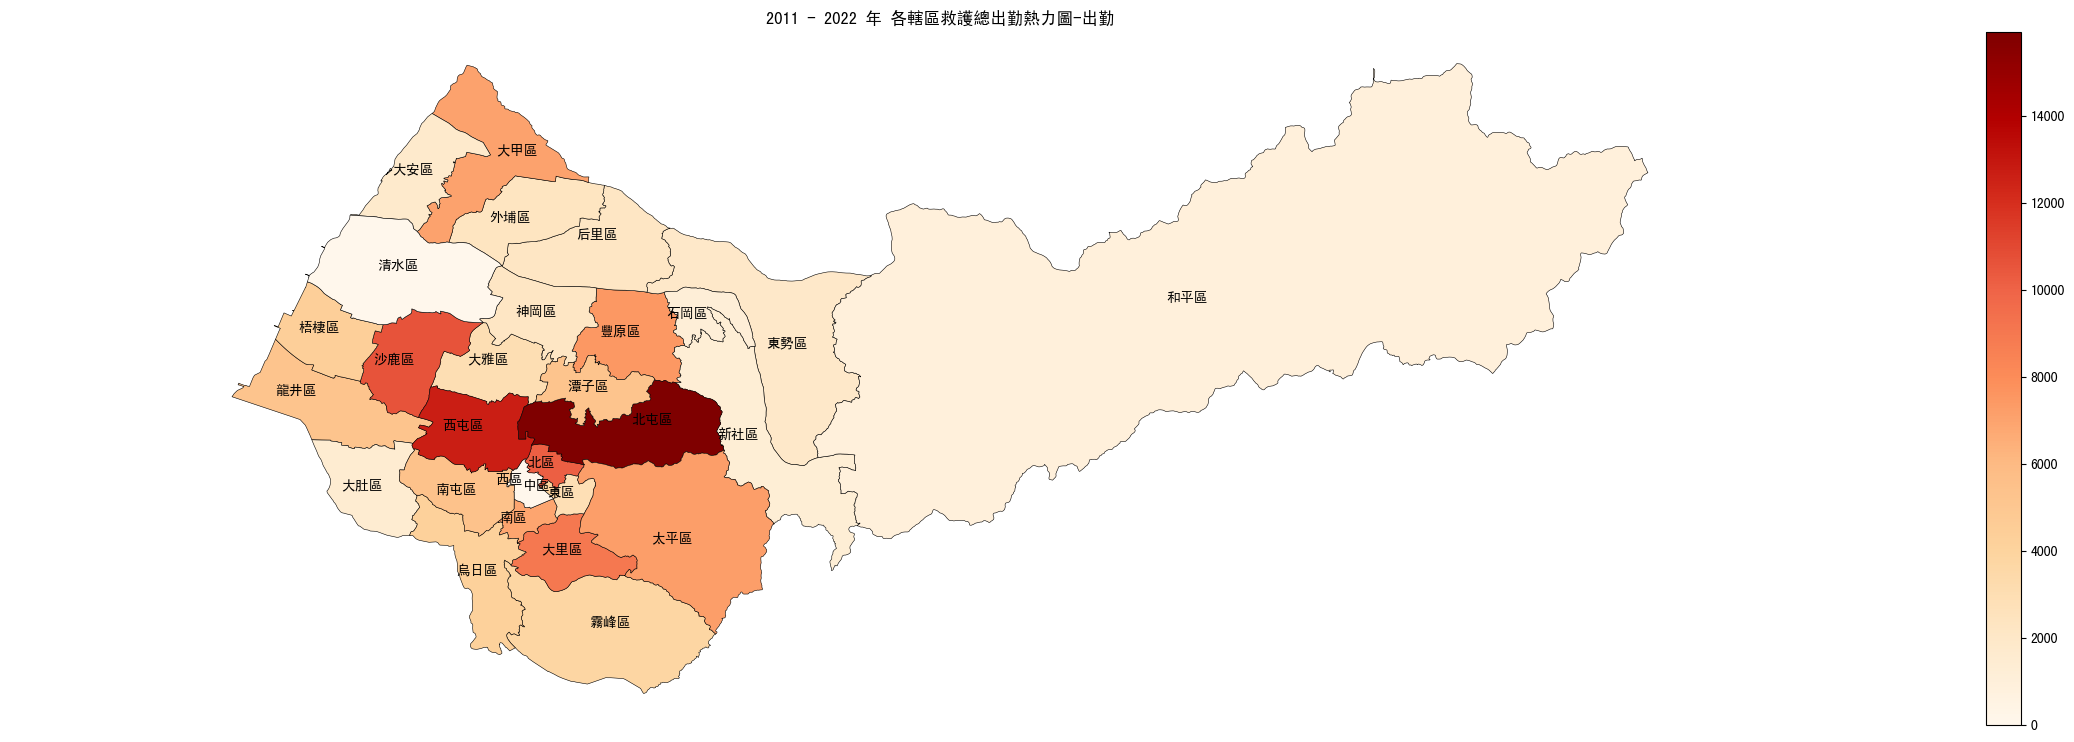

In [147]:
fig, ax = plt.subplots(figsize=(30, 9), dpi=100)

Taichung.plot(ax=ax, column="Sum", cmap="OrRd",edgecolor="k", linewidth=0.4, legend=True)
ax.axis("off")
plt.axis('equal')

plt.title('2011 - 2022 年 各轄區救護總出勤熱力圖-出勤')


# 地圖標註
for n, i in enumerate(taichung_town_shp['coords']):
    plt.text(i[0] - 0.02, i[1], taichung_town_shp['TOWNNAME'][n])  # 標註位置X，Y，標註内容
plt.show()

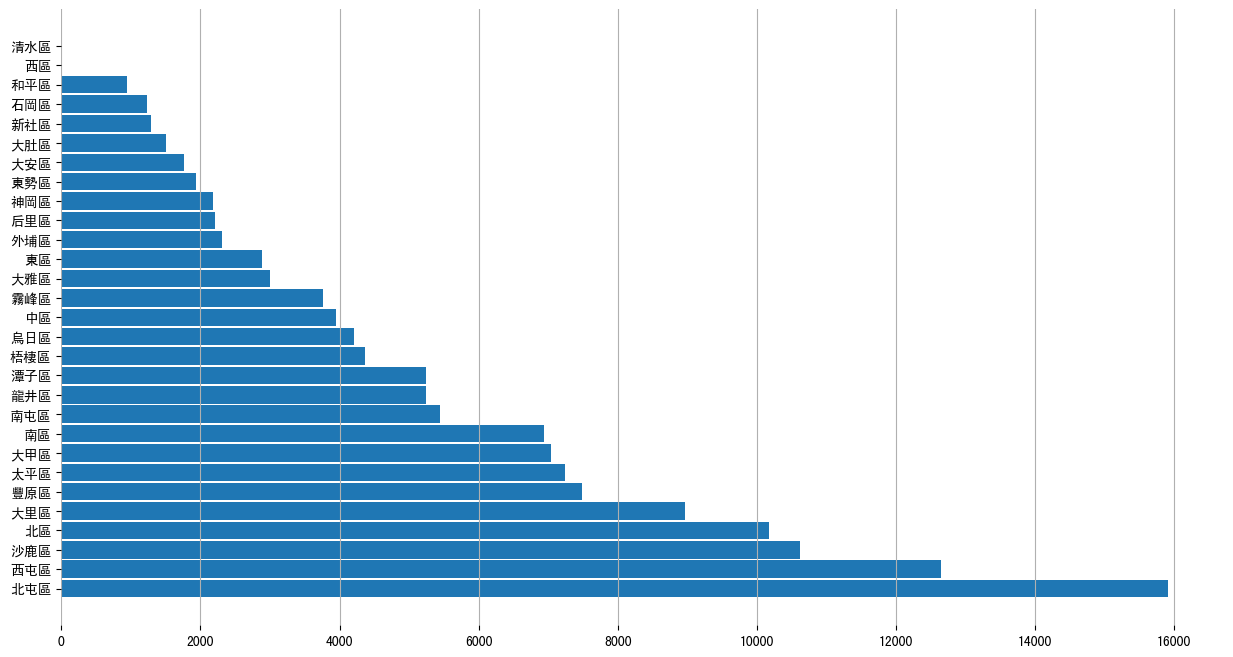

In [148]:
fig, ax = plt.subplots(figsize=(15, 8)) 
ax.barh(df_District_sum['District'], df_District_sum['Sum'],height=0.9)

ax.grid(which='major', axis='x', linestyle='-') #增加格線
plt.box(False)

##### 各年(有)送醫分隊統計

In [123]:
for year in years:
    District_sum_init = {k:0 for k in District_sum.keys()}
    mask  = sendTo_hospital['year'] == int(year)
    class_Counter = function_api.count(sendTo_hospital[mask], counter_colName)
    print(class_Counter)


Counter({'101004_沙鹿91': 692, '101004_梧棲91': 484, '101004_大甲91': 462, '101004_清水91': 396, '101004_龍井91': 153, '101004_清泉91': 134, '101004_外埔91': 128, '101004_犁份91': 127, '101004_大安91': 124, '101004_大雅91': 88, '101004_幼獅91': 85, '101004_神岡91': 59, '101004_豐原91': 47, '101004_潭子91': 40, '101004_后里91': 40, '101004_大肚91': 33, '101004_東勢91': 31, '101004_潭子92': 22, '101004_大里91': 20, '101004_烏日91': 19, '101004_豐原92': 19, '101004_中山91': 18, '101004_勤工91': 18, '101004_太平91': 17, '101004_協和91': 14, '101004_東英91': 13, '101004_南屯91': 12, '101004_大誠91': 11, '101004_仁化92': 11, '101004_水湳91': 9, '101004_梨山91': 9, '101004_四平91': 9, '101004_太平92': 9, '101004_新社91': 8, '101004_中港91': 7, '101004_大里92': 7, '101004_東山91': 7, '101004_石岡91': 7, '101004_北屯91': 7, '101004_國光92': 7, '101004_工業91': 7, '101004_十九甲91': 6, '101004_中區91': 6, '101004_信義91': 6, '101004_雙崎91': 5, '101004_霧峰91': 4, '101004_西屯92': 4, '101004_仁化91': 4, '101004_西屯91': 3, '101004_烏日92': 3, '101004_九甲91': 3, '101004_文昌91': 3, '101004_黎明91': 3

#### 地址轉換經緯度

In [4]:
address = address_df['eSceneT01']
total = len(address)

with open('proxy_list.txt', 'r') as file:
    proxy_ips = file.read().splitlines()

for adr in address:
    adr = str(adr)
    total -= 1
    print(adr + '\t' + '剩餘筆數 :' + str(total))
    if adr == 'nan':
        address_df["longitude"] = None
        address_df["latitude"] = None
    else:
        # print(test.location(adr))
        latitude, longitude = function_api.location(proxy_ips, adr)
        address_df["longitude"] = longitude
        address_df["latitude"] = latitude   
        address_df.to_csv('../part2/merge.csv', index=False)
   

中市東區富榮街52號2樓-2	剩餘筆數 :1638245
使用的Proxy IP：103.106.219.141:8080
120.68705411498894 24.1457521843
尚武路70號	剩餘筆數 :1638244
使用的Proxy IP：103.106.219.141:8080


KeyboardInterrupt: 